# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames



# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")
print(data.head(10))
print(data.dtypes)

   age          workclass education_level  education-num  \
0   39          State-gov       Bachelors           13.0   
1   50   Self-emp-not-inc       Bachelors           13.0   
2   38            Private         HS-grad            9.0   
3   53            Private            11th            7.0   
4   28            Private       Bachelors           13.0   
5   37            Private         Masters           14.0   
6   49            Private             9th            5.0   
7   52   Self-emp-not-inc         HS-grad            9.0   
8   31            Private         Masters           14.0   
9   42            Private       Bachelors           13.0   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners  

### Exercise 1  Exploration 

In [2]:
# The total number of records
n_records = data.shape[0]

In [3]:
# The number of individuals making more than $50000 annually
n_greater_50k = data[data['income'] == '>50K'].shape[0]

In [4]:
# The number of individuals making at most $50000 annually
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

In [5]:
# The percentage of individuals making at more than $50000 annually
greater_percent = (n_greater_50k / n_records) * 100

### Exercise 2 Preprocessing 

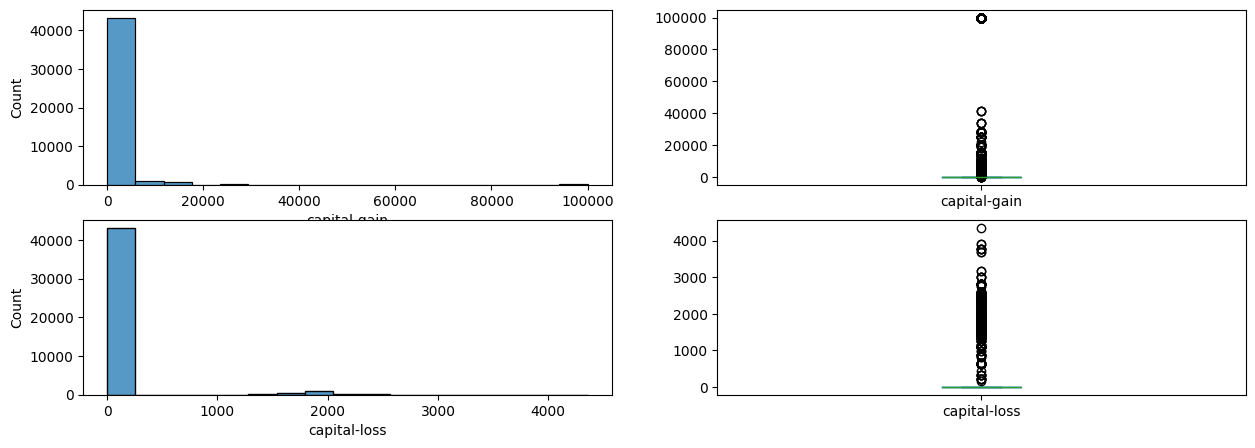

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(2, 2, 1)
sns.histplot(data, x='capital-gain')

plt.subplot(2, 2, 2)
data['capital-gain'].plot.box(figsize=(15, 5))

plt.subplot(2, 2, 3)
sns.histplot(data, x='capital-loss')

plt.subplot(2, 2, 4)
data['capital-loss'].plot.box(figsize=(15, 5))

plt.show()

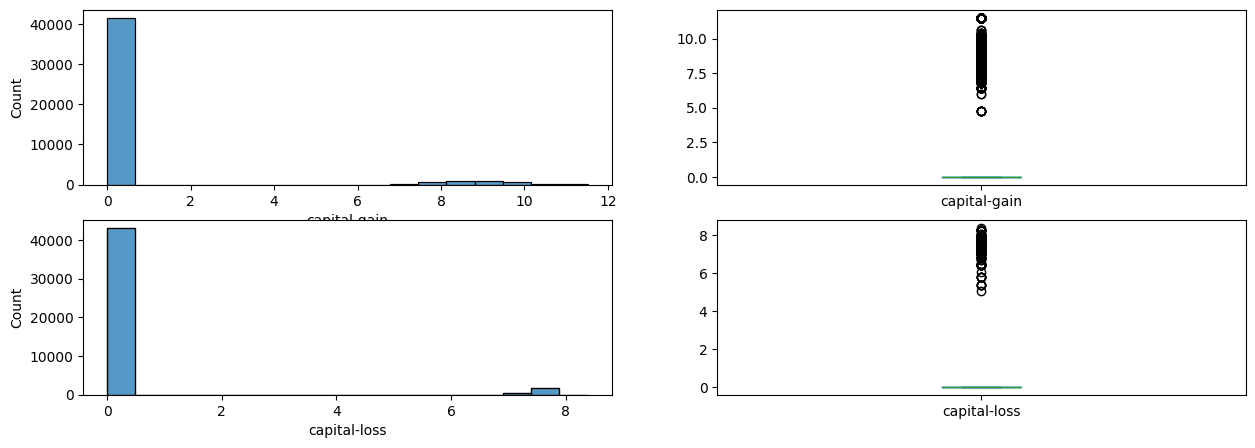

In [7]:
# Outliers Treatment
data['capital-gain'] = np.log(1 + data['capital-gain'])
data['capital-loss'] = np.log(1 + data['capital-loss'])

plt.subplot(2, 2, 1)
sns.histplot(data, x='capital-gain')

plt.subplot(2, 2, 2)
data['capital-gain'].plot.box(figsize=(15, 5))

plt.subplot(2, 2, 3)
sns.histplot(data, x='capital-loss')

plt.subplot(2, 2, 4)
data['capital-loss'].plot.box(figsize=(15, 5))

plt.show()


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])

transformed_data = preprocessor.fit_transform(data)
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

transformed_data = pd.DataFrame(transformed_data, columns=all_feature_names)
transformed_data['income'] = data['income'].values
transformed_data

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,0.301370,0.800000,0.667492,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
45218,0.301370,0.800000,0.000000,0.0,0.357143,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
45219,0.287671,0.800000,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
45220,0.369863,0.800000,0.747375,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### Exercise 3 Shuffle and Split Data

In [9]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
X = transformed_data.drop('income', axis=1)
Y = transformed_data['income']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=0)

### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [10]:
# Evaluating Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

### Exercise 5 Evaluating Model 

In [11]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)

0.8404643449419569
